# Trabajo Práctico 2 [Parte 1]

#### Ing. Luciano M. Smith

En esta parte de la resolución se utilizará el dataset completo para generar modelos de regresion lineal, regresion logistica junto con random forest y MLP a fin de probar los métodos que figuran en el paper.

# Importar librerías

Se importan las librerías que serán utilizadas en el trabajo.

In [1]:
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# Cargar datos
Se cargan los datos de entrenamiento.

In [2]:
columnas = ['likes', 'visitas', 'interes', 'categoria', 'min_cc1', 'max_cc1','average_cc1', 'median_cc1', 'std_dev_cc1','min_cc2', 'max_cc2','average_cc2', 'median_cc2', 'std_dev_cc2', 'min_cc3', 'max_cc3','average_cc3', 'median_cc3', 'std_dev_cc3','min_cc4', 'max_cc4','average_cc4', 'median_cc4', 'std_dev_cc4','min_cc5', 'max_cc5','average_cc5', 'median_cc5', 'std_dev_cc5', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5','base_time', 'post_length', 'post_share_count', 'post_promotion_status', 'hour_local', 'pub_domingo', 
            'pub_lunes', 'pub_martes', 'pub_miercoles', 'pub_jueves', 'pub_viernes', 'pub_sabado', 'base_domingo', 'base_lunes', 'base_martes', 'base_miercoles', 'base_jueves', 'base_viernes', 'base_sabado', 'target']
ds = pd.read_csv('Features_Variant_5.csv', sep = ',', names=columnas)
ds.head()

,likes,visitas,interes,categoria,min_cc1,max_cc1,average_cc1,median_cc1,std_dev_cc1,min_cc2,...,pub_viernes,pub_sabado,base_domingo,base_lunes,base_martes,base_miercoles,base_jueves,base_viernes,base_sabado,target
0,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0
1,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,1,0,0,0,0,0,0,0
2,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0


# Análisis exploratorio básico y preprocesamiento de los datos

Acorde al paper, los datos ya se encuentran "limpios" de todas formas se realizan algunas verificaciones. 

In [47]:
# Valores nulos, tipo de campos, estadísticas

# ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, 
# reduciendo dimensiones, etc. según considere necesario. 
# ==============================================================================
#ds.describe()
ds.info()
#ds.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199030 entries, 0 to 199029
Data columns (total 54 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   likes                  199030 non-null  int64  
 1   visitas                199030 non-null  int64  
 2   interes                199030 non-null  int64  
 3   categoria              199030 non-null  int64  
 4   min_cc1                199030 non-null  float64
 5   max_cc1                199030 non-null  float64
 6   average_cc1            199030 non-null  float64
 7   median_cc1             199030 non-null  float64
 8   std_dev_cc1            199030 non-null  float64
 9   min_cc2                199030 non-null  float64
 10  max_cc2                199030 non-null  float64
 11  average_cc2            199030 non-null  float64
 12  median_cc2             199030 non-null  float64
 13  std_dev_cc2            199030 non-null  float64
 14  min_cc3                199030 non-nu

# Correlación

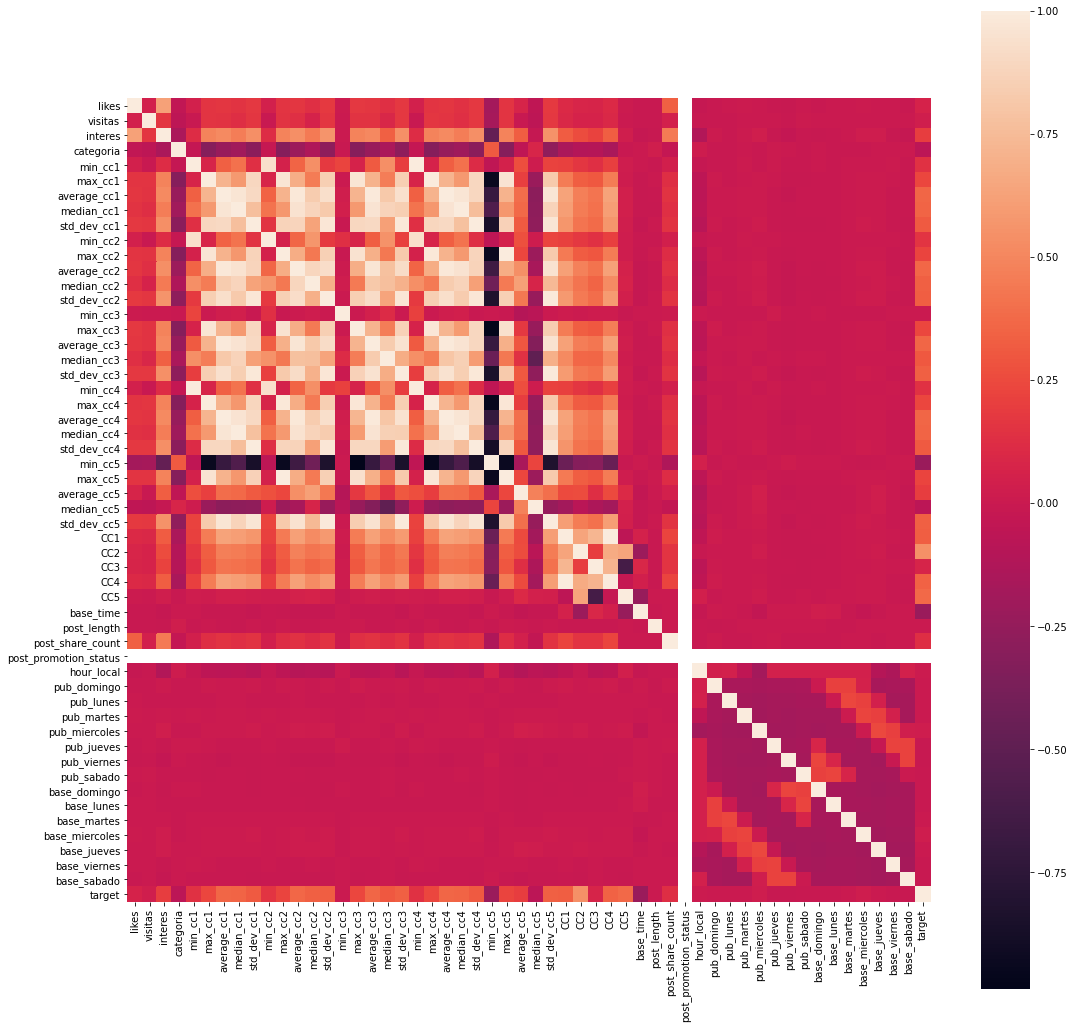

In [48]:
corr_matrix = ds.corr(method='pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 18))
sns.heatmap(corr_matrix, square = True, ax = ax)
ax.tick_params(labelsize = 10)

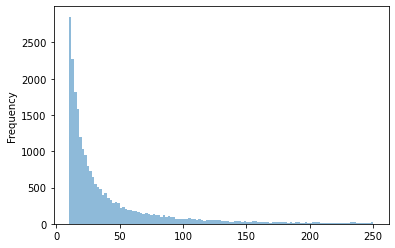

In [4]:
ax = ds['target'].plot.hist(bins=120, alpha=0.5, range=[10, 250])

Se observa que una gran parte de los posts tienen menos de 50 comentarios. Por otro lado más del 95% de los posts tienen menos de 100 comentarios.

# División del dataset

In [3]:
X = ds.drop(columns=['post_promotion_status','target'],axis=1) # se elimina la columna post_promotion_status ya que no aporta información al modelo
y = ds['target']
X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1), 
                                                    train_size = 0.7, random_state = 46,shuffle = True)

In [50]:
X_train.describe()

,likes,visitas,interes,categoria,min_cc1,max_cc1,average_cc1,median_cc1,std_dev_cc1,min_cc2,...,pub_jueves,pub_viernes,pub_sabado,base_domingo,base_lunes,base_martes,base_miercoles,base_jueves,base_viernes,base_sabado
count,1.393210e+05,139321.000000,1.393210e+05,139321.00000,139321.000000,139321.000000,139321.000000,139321.000000,139321.000000,139321.000000,...,139321.000000,139321.000000,139321.000000,139321.000000,139321.000000,139321.000000,139321.000000,139321.000000,139321.000000,139321.00000
mean,1.311527e+06,4665.464115,4.488047e+04,24.21935,0.471293,486.035214,55.932094,35.289357,68.152851,0.069444,...,0.144788,0.145628,0.137180,0.139972,0.134624,0.136620,0.147975,0.154506,0.143963,0.14234
std,6.605902e+06,20554.937407,1.110753e+05,19.92446,13.517788,538.927217,86.797060,68.551721,82.451710,2.179306,...,0.351888,0.352734,0.344038,0.346959,0.341323,0.343447,0.355076,0.361435,0.351053,0.34940
min,3.600000e+01,0.000000,0.000000e+00,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.714900e+04,0.000000,6.980000e+02,9.00000,0.000000,49.000000,5.534591,2.000000,8.033255,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,2.929110e+05,0.000000,7.045000e+03,18.00000,0.000000,256.000000,23.647407,12.000000,35.022296,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.204214e+06,99.000000,5.141100e+04,32.00000,0.000000,784.000000,70.931961,41.000000,104.152684,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,4.869723e+08,186370.000000,6.089942e+06,106.00000,1458.000000,2495.000000,2031.000000,2123.000000,762.357746,227.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


# Modelos y evaluación
Se prueban diferentes modelos para predecir la variable objetivo. 
Se calculan las métricas correspondientes. 

In [4]:
# Como la regularización de Ridge y Lasso operan sobre las magnitudes de los parámetros, es necesario 
# estandarizar las features para que tengan igual rango de escala.

from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
y_scaler = StandardScaler()

# Escalamos el dataset de entrenamiento haciendo un fit y transform del scaler
X_train = x_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)

# Transformamos el dataset de test (no hacemos fit)
X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

columnas_train = ['likes', 'visitas', 'interes', 'categoria', 'min_cc1', 'max_cc1','average_cc1', 'median_cc1', 'std_dev_cc1','min_cc2', 'max_cc2','average_cc2', 'median_cc2', 'std_dev_cc2', 'min_cc3', 'max_cc3','average_cc3',
            'median_cc3', 'std_dev_cc3','min_cc4', 'max_cc4','average_cc4', 'median_cc4', 'std_dev_cc4','min_cc5', 'max_cc5','average_cc5', 'median_cc5', 'std_dev_cc5', 'CC1', 'CC2', 'CC3', 'CC4', 'CC5','base_time', 'post_length', 'post_share_count', 'hour_local', 'pub_domingo', 
            'pub_lunes', 'pub_martes', 'pub_miercoles', 'pub_jueves', 'pub_viernes', 'pub_sabado', 'base_domingo', 'base_lunes', 'base_martes', 'base_miercoles', 'base_jueves', 'base_viernes', 'base_sabado']

## (A) Linear Regression con regularización Lasso

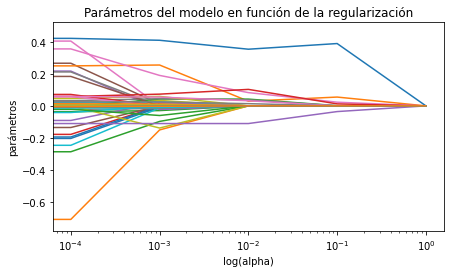

In [5]:
# Determinación del alpha

A = 0.01   
alphas = np.logspace(-10, 2, 200)
alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1]

# Evolución de los parámetros en función de alpha

coefs = []

for alpha in alphas:
    modelo_temp = linear_model.Lasso(alpha=alpha)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.show()



In [70]:
A = 0.01
regr_lr = linear_model.Lasso(alpha=A)
regr_lr.fit(X = X_train, y = y_train)

Lasso(alpha=0.01)

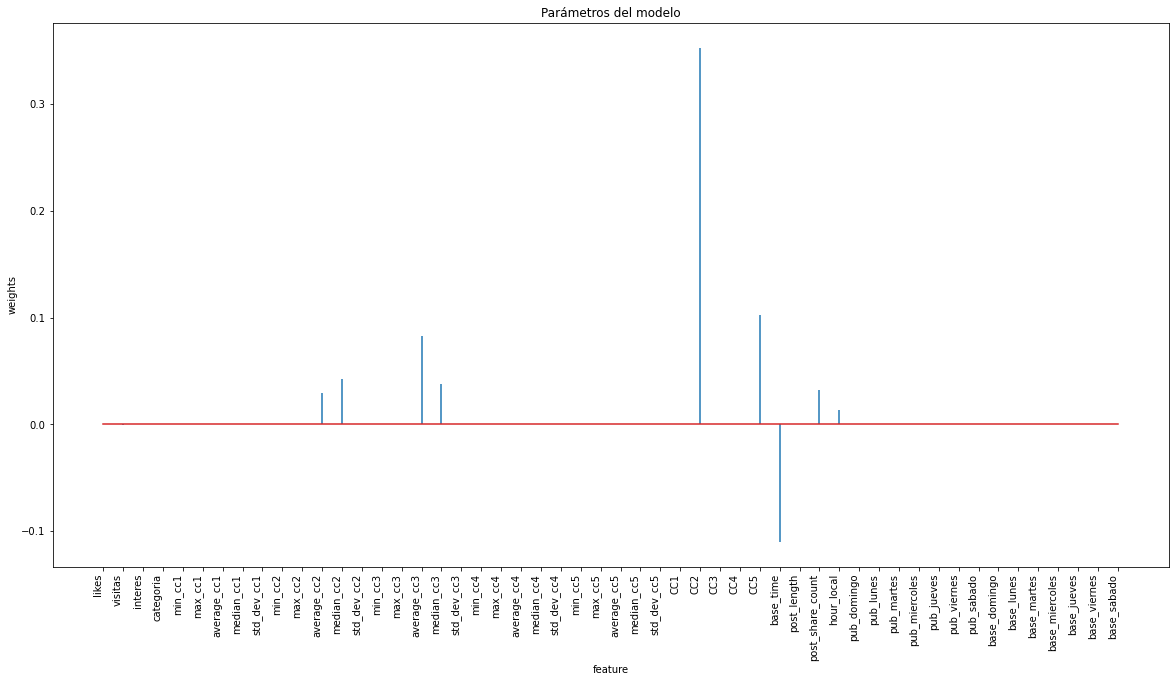

In [71]:
# Coeficientes del modelo
df_coeficientes = pd.DataFrame({'predictor': columnas_train,'coef': regr_lr.coef_.flatten()})
fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo');

Acorde a lo anterior, las features que se consideran relevantes para el modelo son:

In [72]:
res_lr = pd.Series(abs(regr_lr.coef_), index=columnas_train).sort_values(ascending=False)
res_lr = res_lr[res_lr > 0]
print(res_lr)

CC2                 0.353000
base_time           0.109972
CC5                 0.102756
average_cc3         0.082682
median_cc2          0.042196
median_cc3          0.037582
post_share_count    0.031927
average_cc2         0.029285
hour_local          0.013827
base_miercoles      0.000702
visitas             0.000666
dtype: float64


In [73]:
# Prueba del modelo
predicciones = regr_lr.predict(X=X_test)
predicciones = predicciones.flatten()

In [74]:
#Error de test del modelo. 

rmse_ols = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = False)
R2 = metrics.r2_score(y_test, predicciones)

print(f"El error (rmse) de test es: {rmse_ols}")
print(f"R^2 es: {R2}")


El error (rmse) de test es: 0.753644612391547
R^2 es: 0.344432892840447


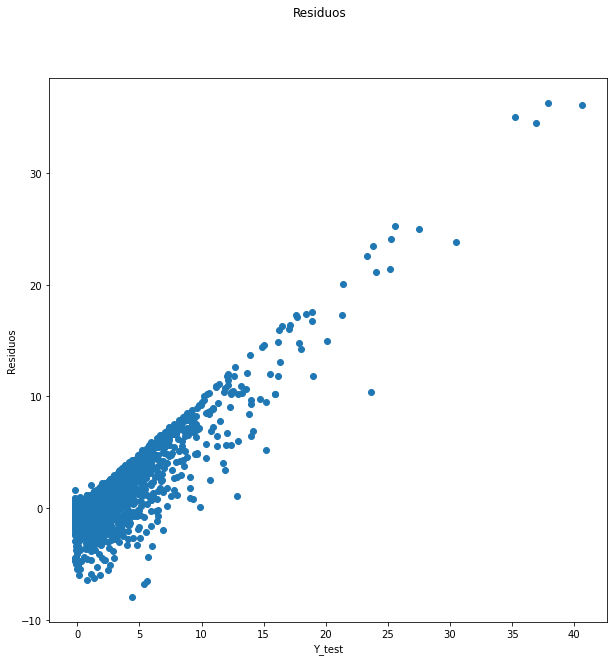

In [75]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Residuos')
plt.xlabel('Y_test')
plt.ylabel('Residuos')
plt.scatter(y_test,y_test-predicciones.reshape(-1, 1))

#### Conclusiones:

El RMSE (Error Cuadrático Medio) de 0.76 de los valores normalizados indica que los valores observados y los predichos por el modelo estan muy distantes y es conveniente seguir probando otros modelos o variaciones del dataset.

Por otro lado, el valor del coeficiente de determinación (R2) 0.34 indica que la proporción de la variable target explicada por el modelo es muy baja (cuando 0 significa sin capacidad de predecir y 1 explica un modelo perfectamente capaz de explicar la variacion de las observaciones) y, de forma consistente con lo anterior, es conveniente seguir probando otros modelos.

## (B) Logistic Regression
Si bien lo que se desea es obtener es la estimación del número de comentarios, decidí probar la regresión logística con el objetivo de poder clasificar si un post será existoso o no en función de los comentarios que se realicen.

In [6]:
X_lr = pd.DataFrame(ds.drop(columns=['post_promotion_status','target'],axis=1))
y_lr = pd.DataFrame(ds['target'])


#y_lr.loc[y_lr.target == 0, 'target'] = 0
#y_lr.loc[y_lr.target >= 1, 'target'] = 1
#y_lr.loc[y_lr.target >= 11, 'target'] = 2
#y_lr.loc[y_lr.target >= 101, 'target'] = 3
#y_lr.loc[y_lr.target > 500, 'target'] = 4


y_lr.loc[y_lr.target == 0, 'target'] = 0
y_lr.loc[y_lr.target >= 50, 'target'] = 1
y_lr.loc[y_lr.target > 100, 'target'] = 2



y_lr['target'] = y_lr['target'].astype("string")

y_lr.loc[y_lr.target == '0', 'target'] = 'A'
y_lr.loc[y_lr.target == '1', 'target'] = 'B'
y_lr.loc[y_lr.target == '2', 'target'] = 'C'
#y_lr.loc[y_lr.target == '3', 'target'] = 'D'
#y_lr.loc[y_lr.target == '4', 'target'] = 'E'


X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr.values.reshape(-1,1), 
                                                    train_size = 0.7, random_state = 46,shuffle = True)

# 0 COMENTARIOS = A (NO EXITOSO)
# 1 a 10 COMENTARIOS = B (BAJO EXITO)
# 11 a 100 COMENTARIOS = C (MODERADO EXITO)
# 101 a 500 COMENTARIOS = D (EXITOSO)
# mas de 500 COMENTARIOS = E (MUY EXITOSO)

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train_lr, y_train_lr)
predicciones = clf.predict(X_test_lr)

clf.score(X_test_lr, y_test_lr) #accuracy

0.5545060208678758

#### Conclusiones:

El nivel de precisión es 55%, lo cual me parece muy bajo para las 3 categorias que finalmente se dejaron. En un futuro, se podría analizar si cambiando los limites de las clases o la cantidad de clases se logra obtener un mejor resultado.

## (C) Random Forest
Se decide probar este modelo que utiliza decisions trees ya que en el paper se han probado modelos con árboles de decisión.

In [87]:
regr_rf = RandomForestRegressor(max_depth=15, random_state=0)
regr_rf.fit(X_train, y_train)
predicciones = regr_rf.predict(X_test)

0.6893625885731396

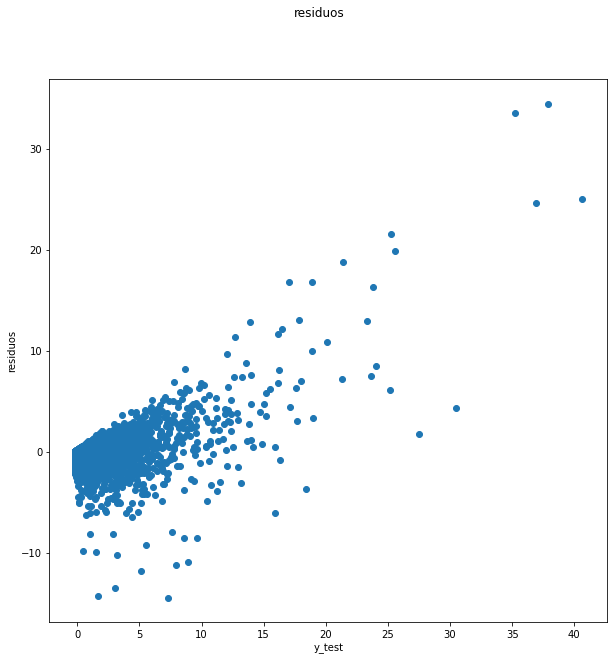

In [88]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.scatter(y_test,y_test-predicciones.reshape(-1, 1))
regr_rf.score(X_test, y_test)

In [89]:
rmse = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = False)
R2 = metrics.r2_score(y_test, predicciones)

print(f"El error (rmse) de test es: {rmse}")
print(f"R^2 es: {R2}")

# depth = 1  RMSE = 0.81  R2 = 0.24
# depth = 5  RMSE = 0.55  R2 = 0.64
# depth = 10  RMSE = 0.52  R2 = 0.68
# depth = 15  RMSE = 0.52  R2 = 0.69

El error (rmse) de test es: 0.5187820018601489
R^2 es: 0.6893625885731396


## Conclusiones:

Se probaron árboles de varias profundidades (depth de 1 a 15). Se obtuvo los mejores resultados con depth = 15 por lo que ameritaría seguir probando con el aumento de este parámetro. El RMSE (Error Cuadrático Medio) de 0.52 indica una mejora importante respecto al modelo de Linear Regression w/Lasso.

Por otro lado, el valor del coeficiente de determinación (R2) es de aproximadamente 70%, lo que indica que la proporción de la variable target explicada por el modelo ha mejorado muchisimo frente al 34% de del modelo A. 

## (D) MLP Multi-Layer Perceptron

In [97]:
#X_mlp = pd.DataFrame(ds.drop(columns=['post_promotion_status','target'],axis=1)) 
#y_mlp = pd.DataFrame(ds['target'])
#X_mlp_train, X_mlp_test, y_mlp_train, y_mlp_test = train_test_split(X_mlp,y_mlp.values.reshape(-1,1), train_size = 0.7, random_state = 1234, shuffle = True)

#regr_mlp = MLPRegressor(random_state=1, max_iter=500)
#regr_mlp.fit(X_mlp_train, y_mlp_train)
#predicciones_mlp = regr_mlp.predict(X_mlp_test)


regr_mlp = MLPRegressor(random_state=1, max_iter=1000)
regr_mlp.fit(X_train, y_train)
predicciones = regr_mlp.predict(X_test)


0.6112157461335376

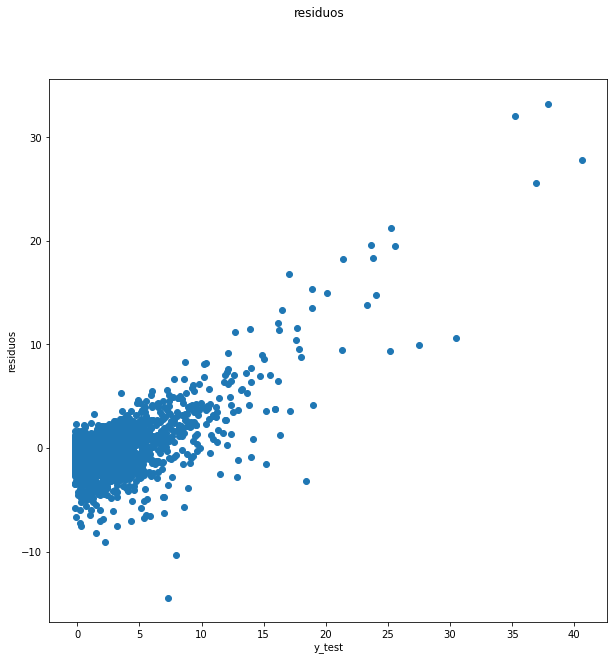

In [98]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
#plt.scatter(y_mlp_test,y_mlp_test-predicciones_mlp.reshape(-1, 1))
plt.scatter(y_test,y_test-predicciones.reshape(-1, 1))
regr_mlp.score(X_test, y_test)

In [99]:
# Error de test del modelo. 

#rmse = mean_squared_error(y_true  = y_mlp_test, y_pred  = predicciones, squared = False)
#R2 = metrics.r2_score(y_mlp_test, predicciones)

rmse = mean_squared_error(y_true  = y_test, y_pred  = predicciones, squared = False)
R2 = metrics.r2_score(y_test, predicciones)

print(f"El error (rmse) de test es: {rmse}")
print(f"R^2 es: {R2}")

# iteraciones = 100    RMSE = 0.57   R2 = 0.61
# iteraciones = 500    RMSE = 0.58   R2 = 0.61
# iteraciones = 1000   RMSE = 0.58   R2 = 0.61

El error (rmse) de test es: 0.5803798889152675
R^2 es: 0.6112157461335376


## Conclusiones:

Se probó este modelo debido a que en el paper fue un modelo que dio buenos resultados. En mi caso, utilizando las m´tricas RMSE y R2, los valores obtenidos son relativamente buenos y se aproximan bastante a los obtenidos por Random Forest.